In [1]:
import pandas as pd
import os

results_dir = '../results/preprocessed_data/task2/'

df_train =  pd.read_csv(os.path.join(results_dir, 'df_train.csv'))
df_test = pd.read_csv(os.path.join(results_dir, 'df_test.csv'))
df_train_target2a = pd.read_csv(os.path.join(results_dir, 'df_train_target2a.csv'))
df_train_target2b = pd.read_csv(os.path.join(results_dir, 'df_train_target2b.csv'))
df_extra_data = pd.read_csv(os.path.join(results_dir, 'df_extra_data.csv'))

# ✅ Mostrar formas
print("✅ Shapes:")
print("df_train         :", df_train.shape)
print("df_test          :", df_test.shape)
print("df_target2a (hipp):", df_train_target2a.shape)
print("df_target2b (baga):", df_train_target2b.shape)
print("df_extra_data    :", df_extra_data.shape)


✅ Shapes:
df_train         : (79, 4)
df_test          : (12, 4)
df_target2a (hipp): (79, 4)
df_target2b (baga): (79, 4)
df_extra_data    : (237, 4)


In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import random


def find_nonzero_slices(seg, name=""):
    """
    Retorna el índice del slice donde hay segmentación (valor > 0).
    También imprime cuántos slices tienen contenido.
    """
    nonzero_slices = [i for i in range(seg.shape[2]) if np.any(seg[:, :, i] > 0)]
    print(f"📍 {name}: {len(nonzero_slices)} slices con segmentación")
    if nonzero_slices:
        print(f"   Slices con segmentación: {nonzero_slices}")
        return nonzero_slices[len(nonzero_slices)//2]  # Slice medio entre los válidos
    else:
        print(f"⚠️  {name}: Segmentación vacía.")
        return seg.shape[2] // 2  # fallback


📍 HF Hippocampus: 30 slices con segmentación
   Slices con segmentación: [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
📍 HF Basal Ganglia: 26 slices con segmentación
   Slices con segmentación: [67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
🧠 HF Hippocampus slice 63 - unique labels: [0. 1. 2.]
🧠 HF Basal Ganglia slice 80 - unique labels: [0. 5. 6. 7.]


/tmp/ipykernel_618730/1394812952.py:57: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_618730/1394812952.py:57: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  plt.tight_layout()
/home/va0831/env_cris/lib64/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/va0831/env_cris/lib64/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


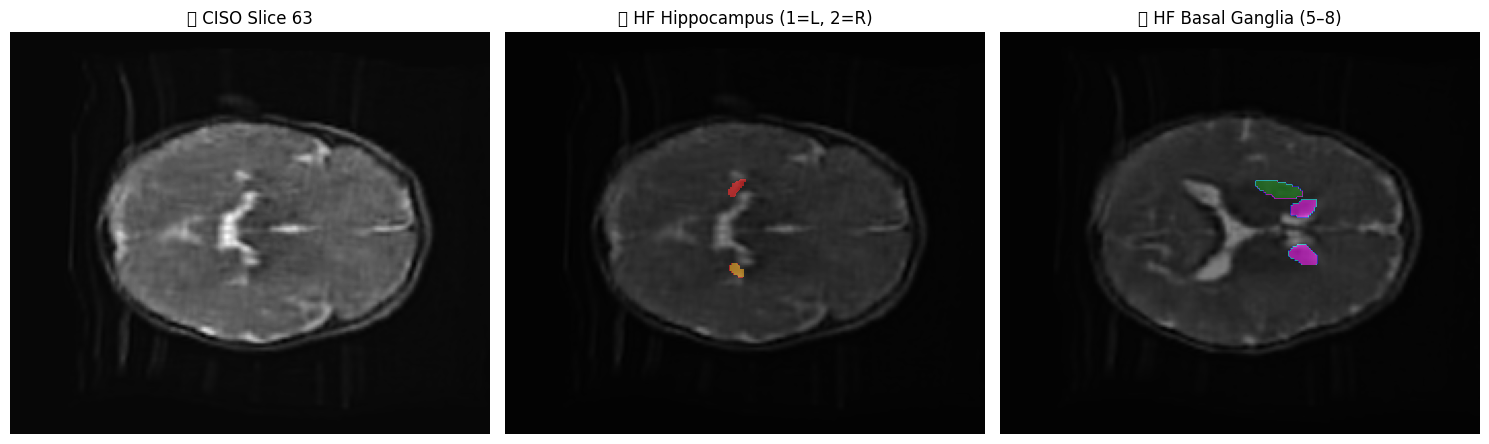


🧩 Máscaras separadas - HF Hippocampus


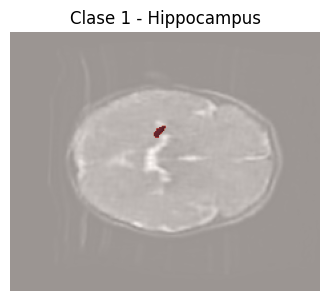

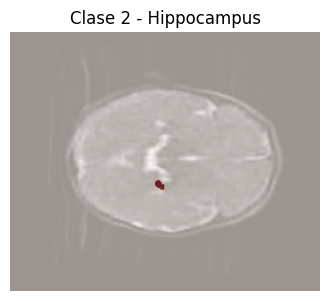


🧩 Máscaras separadas - HF Basal Ganglia


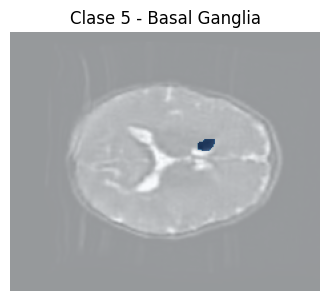

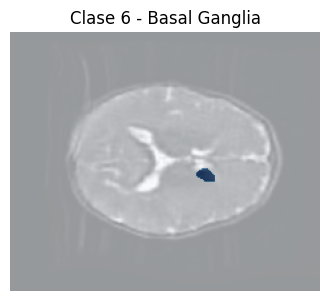

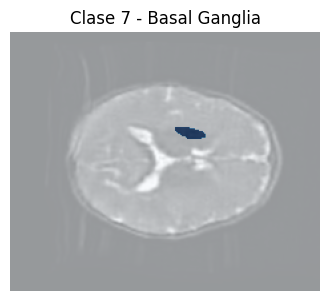

In [3]:

# 📁 Carga una muestra aleatoria de entrenamiento
row = df_train.sample(1).iloc[0]
img_path = row['filepath']
id_sample = row['ID']

# Rutas a segmentaciones
seg_hipp_path = df_train_target2a[df_train_target2a['ID'] == id_sample]['filepath'].values[0]
seg_baga_path = df_train_target2b[df_train_target2b['ID'] == id_sample]['filepath'].values[0]

# Carga los volúmenes
img = nib.load(img_path).get_fdata()
seg_hipp = nib.load(seg_hipp_path).get_fdata()
seg_baga = nib.load(seg_baga_path).get_fdata()



# 🧠 Slices óptimos
slice_idx_hipp = find_nonzero_slices(seg_hipp, "HF Hippocampus")
slice_idx_baga = find_nonzero_slices(seg_baga, "HF Basal Ganglia")

# Slice con imagen y máscaras
img_slice = img[:, :, slice_idx_hipp]
hipp_slice = seg_hipp[:, :, slice_idx_hipp]
baga_slice = seg_baga[:, :, slice_idx_baga]

# 🔍 Valores únicos
hipp_values = np.unique(hipp_slice)
baga_values = np.unique(baga_slice)
print(f"🧠 HF Hippocampus slice {slice_idx_hipp} - unique labels:", hipp_values)
print(f"🧠 HF Basal Ganglia slice {slice_idx_baga} - unique labels:", baga_values)

# 🎨 Mapas de color para overlay
cmap_hipp = ListedColormap(['black', 'red', 'orange'])
cmap_baga = ListedColormap(['black', 'blue', 'cyan', 'magenta', 'green'])

# 📊 Visualización de overlay
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_slice, cmap='gray')
plt.title(f"🧠 CISO Slice {slice_idx_hipp}")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_slice, cmap='gray')
plt.imshow(hipp_slice, cmap=cmap_hipp, alpha=0.5, vmin=0, vmax=2)
plt.title("🏷️ HF Hippocampus (1=L, 2=R)")
plt.axis('off')

plt.subplot(1, 3, 3)
img_slice_baga = img[:, :, slice_idx_baga]
plt.imshow(img_slice_baga, cmap='gray')
plt.imshow(baga_slice, cmap=cmap_baga, alpha=0.5, vmin=0, vmax=8)
plt.title("🏷️ HF Basal Ganglia (5–8)")
plt.axis('off')

plt.tight_layout()
plt.show()

# 🎯 Mostrar cada clase por separado - Hippocampus
print("\n🧩 Máscaras separadas - HF Hippocampus")
for val in hipp_values:
    if val == 0: continue
    mask = (hipp_slice == val).astype(float)
    plt.figure(figsize=(4, 4))
    plt.imshow(img_slice, cmap='gray')
    plt.imshow(mask, cmap='Reds', alpha=0.6)
    plt.title(f"Clase {int(val)} - Hippocampus")
    plt.axis('off')
    plt.show()

# 🎯 Mostrar cada clase por separado - Basal Ganglia
print("\n🧩 Máscaras separadas - HF Basal Ganglia")
for val in baga_values:
    if val == 0: continue
    mask = (baga_slice == val).astype(float)
    plt.figure(figsize=(4, 4))
    plt.imshow(img_slice_baga, cmap='gray')
    plt.imshow(mask, cmap='Blues', alpha=0.6)
    plt.title(f"Clase {int(val)} - Basal Ganglia")
    plt.axis('off')
    plt.show()


📍 HF Hippocampus: 27 non-empty slices
   Slice indices: [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
📍 HF Basal Ganglia: 23 non-empty slices
   Slice indices: [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
HF Hippocampus slice 68 - unique labels: [0. 1. 2.]
HF Basal Ganglia slice 81 - unique labels: [0. 5. 6. 7. 8.]


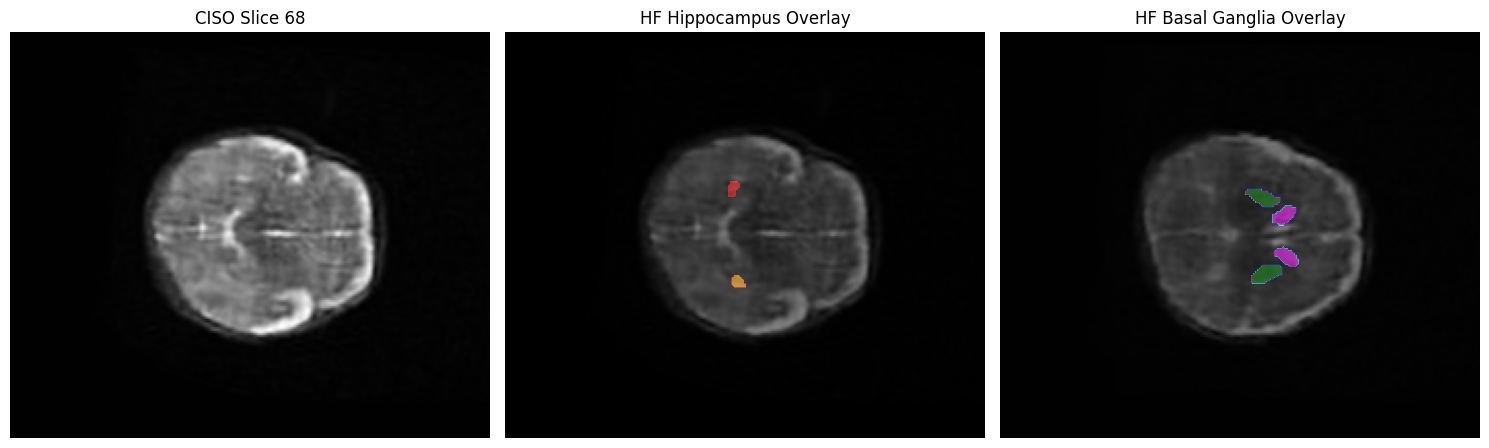


🎯 HF Hippocampus - class-wise masks:


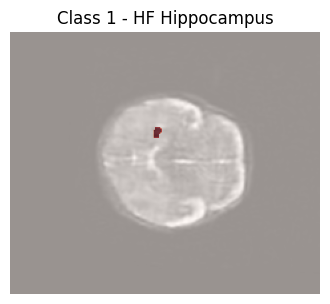

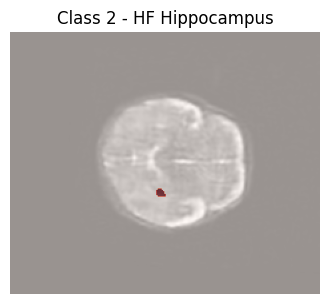


🎯 HF Basal Ganglia - class-wise masks:


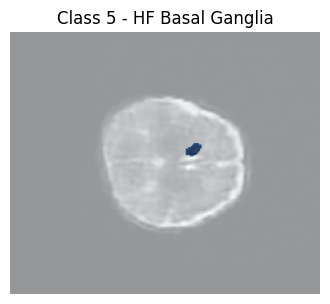

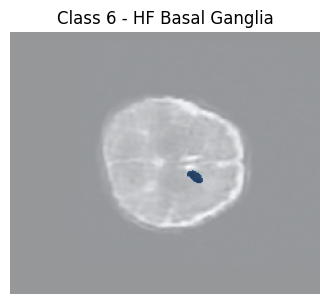

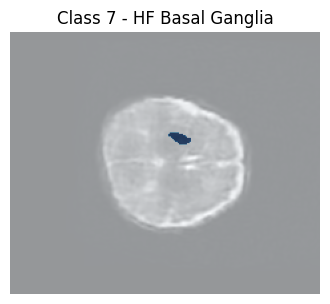

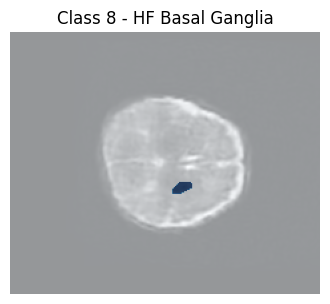

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import nibabel as nib

# 📌 Utility function
def find_nonzero_slices(seg, name=""):
    nonzero_slices = [i for i in range(seg.shape[2]) if np.any(seg[:, :, i] > 0)]
    print(f"📍 {name}: {len(nonzero_slices)} non-empty slices")
    if nonzero_slices:
        print(f"   Slice indices: {nonzero_slices}")
        return nonzero_slices[len(nonzero_slices)//2]
    else:
        print(f"⚠️  {name}: Empty segmentation.")
        return seg.shape[2] // 2

# 📁 Sample image from df_train
row = df_train.sample(1).iloc[0]
img_path = row['filepath']
id_sample = row['ID']

# 📁 Corresponding labels
seg_hipp_path = df_train_target2a[df_train_target2a['ID'] == id_sample]['filepath'].values[0]
seg_baga_path = df_train_target2b[df_train_target2b['ID'] == id_sample]['filepath'].values[0]

# 🧠 Load volumes
img = nib.load(img_path).get_fdata()
seg_hipp = nib.load(seg_hipp_path).get_fdata()
seg_baga = nib.load(seg_baga_path).get_fdata()

# 📍 Optimal slice indices
slice_idx_hipp = find_nonzero_slices(seg_hipp, "HF Hippocampus")
slice_idx_baga = find_nonzero_slices(seg_baga, "HF Basal Ganglia")

# 🖼️ Slice data
img_slice_hipp = img[:, :, slice_idx_hipp]
hipp_slice = seg_hipp[:, :, slice_idx_hipp]

img_slice_baga = img[:, :, slice_idx_baga]
baga_slice = seg_baga[:, :, slice_idx_baga]

# 🔍 Unique values
hipp_values = np.unique(hipp_slice)
baga_values = np.unique(baga_slice)
print(f"HF Hippocampus slice {slice_idx_hipp} - unique labels: {hipp_values}")
print(f"HF Basal Ganglia slice {slice_idx_baga} - unique labels: {baga_values}")

# 🎨 Consistent colormaps
cmap_hipp = ListedColormap(['black', 'red', 'orange'])
cmap_baga = ListedColormap(['black', 'blue', 'cyan', 'magenta', 'green'])

# 🔎 Main overlay view
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_slice_hipp, cmap='gray')
plt.title(f"CISO Slice {slice_idx_hipp}")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_slice_hipp, cmap='gray')
plt.imshow(hipp_slice, cmap=cmap_hipp, alpha=0.5, vmin=0, vmax=2)
plt.title("HF Hippocampus Overlay")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_slice_baga, cmap='gray')
plt.imshow(baga_slice, cmap=cmap_baga, alpha=0.5, vmin=0, vmax=8)
plt.title("HF Basal Ganglia Overlay")
plt.axis('off')

plt.tight_layout()
plt.show()

# 🧩 Show each class - HF Hippocampus
print("\n🎯 HF Hippocampus - class-wise masks:")
for val in hipp_values:
    if val == 0: continue
    mask = (hipp_slice == val).astype(float)
    plt.figure(figsize=(4, 4))
    plt.imshow(img_slice_hipp, cmap='gray')
    plt.imshow(mask, cmap='Reds', alpha=0.6)
    plt.title(f"Class {int(val)} - HF Hippocampus")
    plt.axis('off')
    plt.show()

# 🧩 Show each class - HF Basal Ganglia
print("\n🎯 HF Basal Ganglia - class-wise masks:")
for val in baga_values:
    if val == 0: continue
    mask = (baga_slice == val).astype(float)
    plt.figure(figsize=(4, 4))
    plt.imshow(img_slice_baga, cmap='gray')
    plt.imshow(mask, cmap='Blues', alpha=0.6)
    plt.title(f"Class {int(val)} - HF Basal Ganglia")
    plt.axis('off')
    plt.show()


🔎 Total segmentations to scan: 158


100%|██████████| 158/158 [00:45<00:00,  3.45it/s]
/tmp/ipykernel_618730/1234413692.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_voxels, x="Label", y="Voxel Count", palette="viridis")


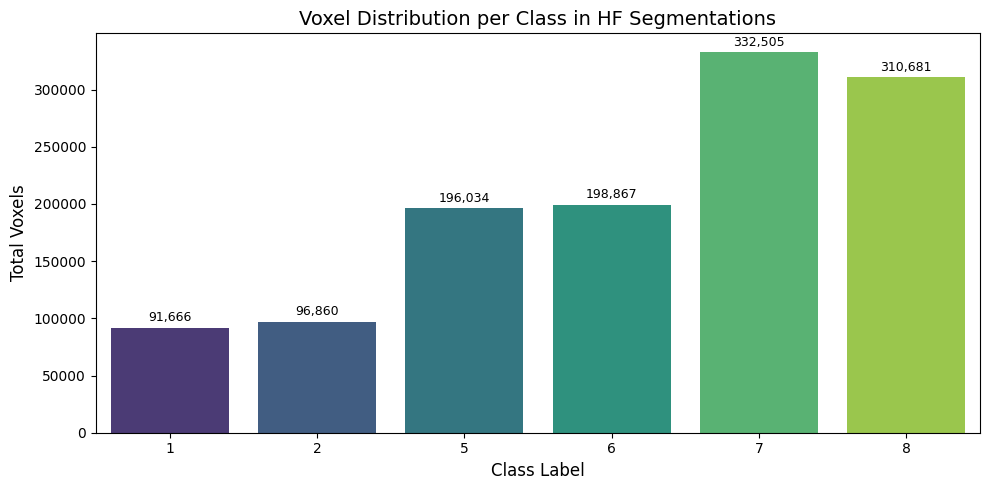

📉 Variance in voxel counts across labels: 8680157470.92


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
from collections import defaultdict
from tqdm import tqdm

# 🔢 Accumulators
voxel_counts = defaultdict(int)

# 🧠 Analyze both hippocampus and basal ganglia segmentations
all_segmentations = list(df_train_target2a['filepath']) + list(df_train_target2b['filepath'])

print(f"🔎 Total segmentations to scan: {len(all_segmentations)}")

for path in tqdm(all_segmentations):
    data = nib.load(path).get_fdata()
    unique, counts = np.unique(data, return_counts=True)
    for u, c in zip(unique, counts):
        if u == 0: continue  # skip background
        voxel_counts[int(u)] += int(c)

# 📊 Convert to DataFrame for plotting
df_voxels = pd.DataFrame({
    "Label": list(voxel_counts.keys()),
    "Voxel Count": list(voxel_counts.values())
})
df_voxels.sort_values("Label", inplace=True)
df_voxels["Label"] = df_voxels["Label"].astype(str)

# 📈 Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_voxels, x="Label", y="Voxel Count", palette="viridis")

# Annotate count above each bar
for idx, row in df_voxels.iterrows():
    plt.text(idx, row["Voxel Count"] + max(df_voxels["Voxel Count"]) * 0.01,
             f"{row['Voxel Count']:,}", ha='center', va='bottom', fontsize=9)

plt.title("Voxel Distribution per Class in HF Segmentations", fontsize=14)
plt.xlabel("Class Label", fontsize=12)
plt.ylabel("Total Voxels", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 📊 Show variance
variance = np.var(list(voxel_counts.values()))
print(f"📉 Variance in voxel counts across labels: {variance:.2f}")


🔎 Scanning 79 segmentations for Task 2a – HF Hippocampus...


100%|██████████| 79/79 [00:23<00:00,  3.39it/s]
/tmp/ipykernel_618730/2404551492.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_voxels, x="Label", y="Voxel Count", palette="mako")


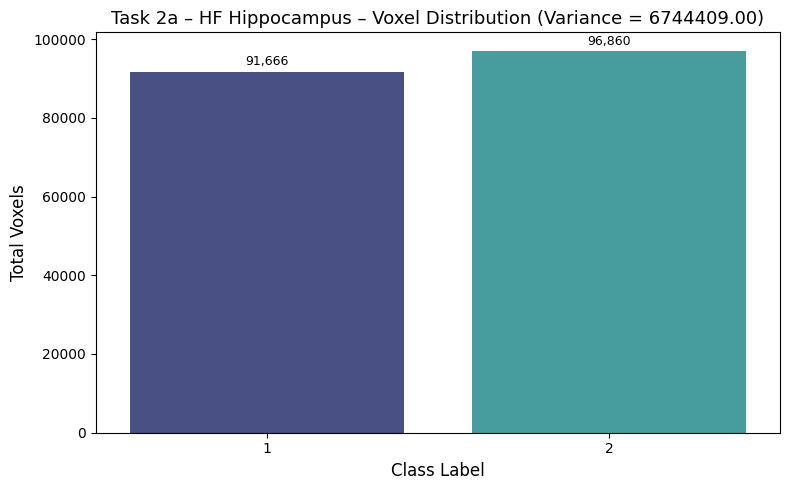

📉 Variance for Task 2a – HF Hippocampus: 6744409.00
🔎 Scanning 79 segmentations for Task 2b – HF Basal Ganglia...


100%|██████████| 79/79 [00:22<00:00,  3.49it/s]
/tmp/ipykernel_618730/2404551492.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_voxels, x="Label", y="Voxel Count", palette="mako")


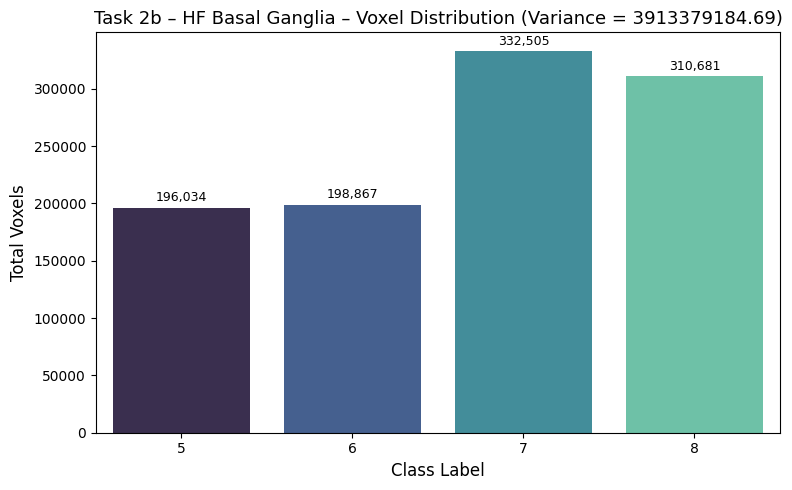

📉 Variance for Task 2b – HF Basal Ganglia: 3913379184.69


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
from collections import defaultdict
from tqdm import tqdm

def compute_voxel_distribution(filepaths, task_name):
    voxel_counts = defaultdict(int)

    print(f"🔎 Scanning {len(filepaths)} segmentations for {task_name}...")
    for path in tqdm(filepaths):
        data = nib.load(path).get_fdata()
        unique, counts = np.unique(data, return_counts=True)
        for u, c in zip(unique, counts):
            if u == 0: continue
            voxel_counts[int(u)] += int(c)

    # 📊 Prepare DataFrame
    df_voxels = pd.DataFrame({
        "Label": list(voxel_counts.keys()),
        "Voxel Count": list(voxel_counts.values())
    })
    df_voxels.sort_values("Label", inplace=True)
    df_voxels["Label"] = df_voxels["Label"].astype(str)

    # 📈 Plot with variance in title
    variance = np.var(list(voxel_counts.values()))
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_voxels, x="Label", y="Voxel Count", palette="mako")

    for idx, row in df_voxels.iterrows():
        plt.text(idx, row["Voxel Count"] + max(df_voxels["Voxel Count"]) * 0.01,
                 f"{row['Voxel Count']:,}", ha='center', va='bottom', fontsize=9)

    plt.title(f"{task_name} – Voxel Distribution (Variance = {variance:.2f})", fontsize=13)
    plt.xlabel("Class Label", fontsize=12)
    plt.ylabel("Total Voxels", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    print(f"📉 Variance for {task_name}: {variance:.2f}")
    return df_voxels, variance

# ✅ Run for both Task 2a and Task 2b
df_voxels_2a, var_2a = compute_voxel_distribution(df_train_target2a['filepath'], "Task 2a – HF Hippocampus")
df_voxels_2b, var_2b = compute_voxel_distribution(df_train_target2b['filepath'], "Task 2b – HF Basal Ganglia")


🔎 Scanning 79 segmentations for Task 2a – HF Hippocampus...


100%|██████████| 79/79 [00:23<00:00,  3.41it/s]


🔎 Scanning 79 segmentations for Task 2b – HF Basal Ganglia...


100%|██████████| 79/79 [00:22<00:00,  3.48it/s]
/tmp/ipykernel_618730/1024790493.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_vox, x="Label", y="Voxels", palette="Set2")


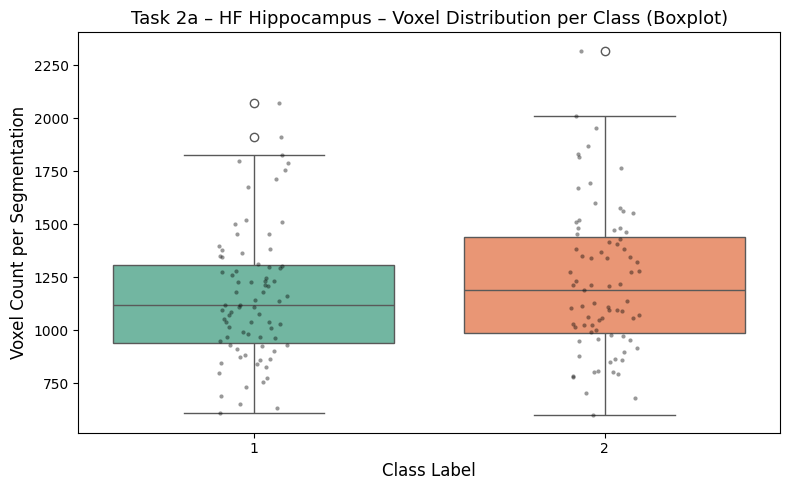

/tmp/ipykernel_618730/1024790493.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_vox, x="Label", y="Voxels", palette="Set2")


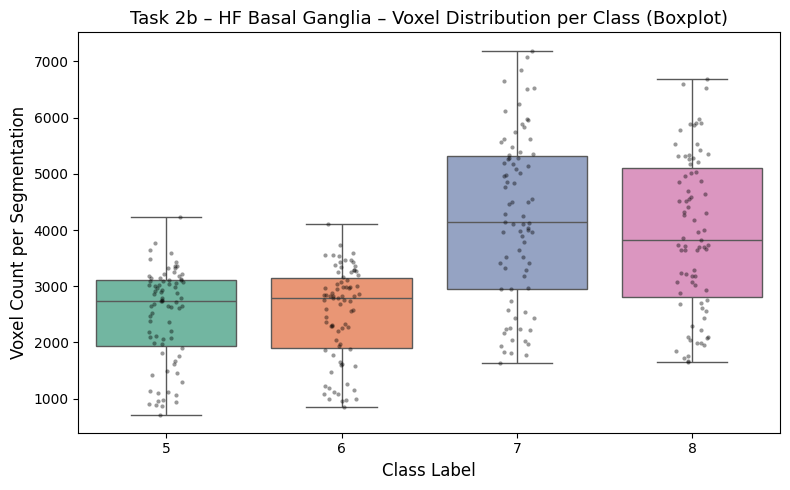

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
from collections import defaultdict
from tqdm import tqdm

def voxel_distribution_dataframe(filepaths, task_name):
    voxel_counts = []

    print(f"🔎 Scanning {len(filepaths)} segmentations for {task_name}...")
    for path in tqdm(filepaths):
        data = nib.load(path).get_fdata()
        unique, counts = np.unique(data, return_counts=True)
        for u, c in zip(unique, counts):
            if u == 0: continue
            voxel_counts.append({"Label": int(u), "Voxels": int(c), "Segmentation": path})

    return pd.DataFrame(voxel_counts)

# 📊 Carga dataframes
df_vox_2a = voxel_distribution_dataframe(df_train_target2a['filepath'], "Task 2a – HF Hippocampus")
df_vox_2b = voxel_distribution_dataframe(df_train_target2b['filepath'], "Task 2b – HF Basal Ganglia")

# 📈 Boxplot por tarea
def plot_boxplot(df_vox, task_name):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_vox, x="Label", y="Voxels", palette="Set2")
    sns.stripplot(data=df_vox, x="Label", y="Voxels", color='black', size=3, jitter=True, alpha=0.4)
    
    plt.title(f"{task_name} – Voxel Distribution per Class (Boxplot)", fontsize=13)
    plt.xlabel("Class Label", fontsize=12)
    plt.ylabel("Voxel Count per Segmentation", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_boxplot(df_vox_2a, "Task 2a – HF Hippocampus")
plot_boxplot(df_vox_2b, "Task 2b – HF Basal Ganglia")


🔎 Scanning 237 segmentations for Extra Data...


100%|██████████| 237/237 [01:16<00:00,  3.11it/s]
/tmp/ipykernel_618730/712828982.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x="Label", y="Voxels", palette="Set3")


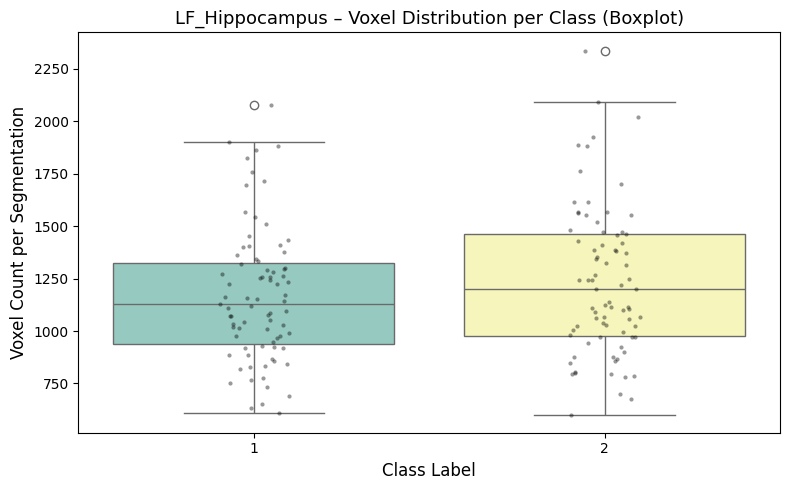

/tmp/ipykernel_618730/712828982.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x="Label", y="Voxels", palette="Set3")


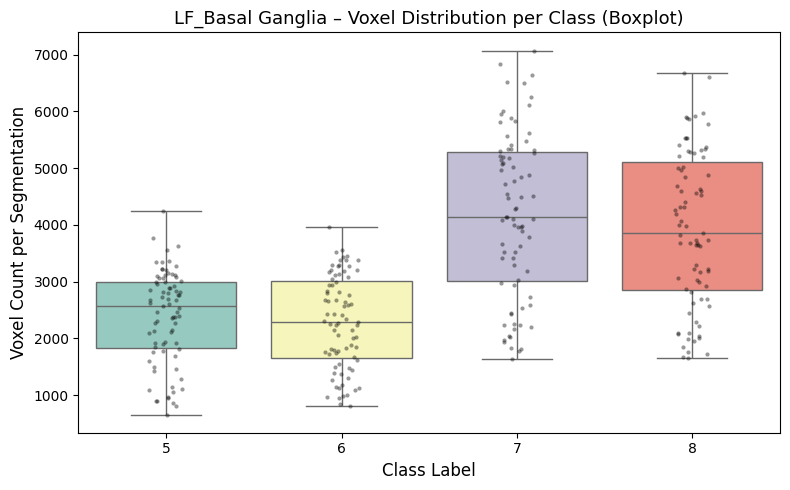

/tmp/ipykernel_618730/712828982.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x="Label", y="Voxels", palette="Set3")


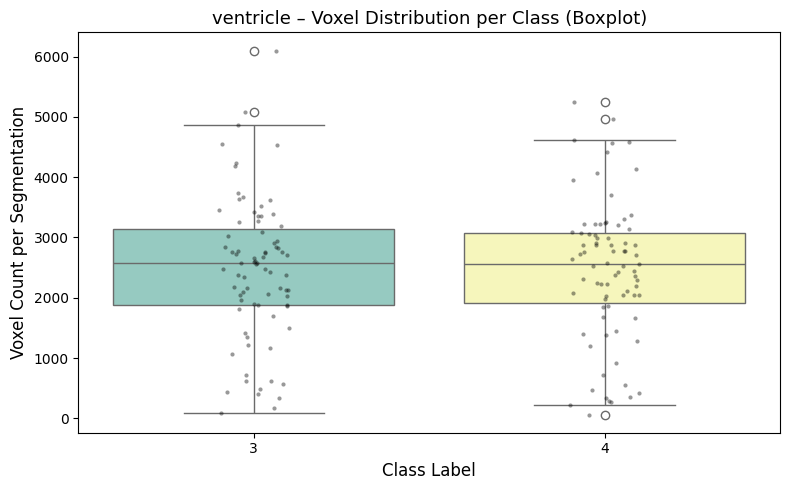

In [ ]:
def voxel_distribution_dataframe_with_category(df, task_name):
    voxel_counts = []

    print(f"🔎 Scanning {len(df)} segmentations for {task_name}...")
    for i, row in tqdm(df.iterrows(), total=len(df)):
        path = row["filepath"]
        category = row["categoria"]
        data = nib.load(path).get_fdata()
        unique, counts = np.unique(data, return_counts=True)
        for u, c in zip(unique, counts):
            if u == 0: continue
            voxel_counts.append({
                "Label": int(u),
                "Voxels": int(c),
                "Segmentation": path,
                "Category": category
            })

    return pd.DataFrame(voxel_counts)

# 📊 DataFrame con todas las categorías extra
df_vox_extra = voxel_distribution_dataframe_with_category(df_extra_data, "Extra Data")

# 📈 Graficar por categoría
def plot_boxplot_by_category(df_vox, category_name):
    df_cat = df_vox[df_vox["Category"] == category_name]
    if df_cat.empty:
        print(f"⚠️ No data found for category: {category_name}")
        return

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_cat, x="Label", y="Voxels", palette="Set3")
    sns.stripplot(data=df_cat, x="Label", y="Voxels", color='black', size=3, jitter=True, alpha=0.4)

    
    category_name = category_name.replace("baga","Basal Ganglia")
    category_name = category_name.replace("hipp","Hippocampus")
    category_name = category_name.replace("_"," ")
    category_name = category_name.replace("ventricle","Ventricle")

    plt.title(f"{category_name} – Voxel Distribution per Class (Boxplot)", fontsize=13)
    plt.xlabel("Class Label", fontsize=12)
    plt.ylabel("Voxel Count per Segmentation", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# 🧠 Ejecutar para cada categoría
for category in df_vox_extra["Category"].unique():
    plot_boxplot_by_category(df_vox_extra, category)
